# Run 56

### Big questions/studies to answer/address:

- Study of selection of TDC event from Multi TDC hits (*no significant effect*)
- Issue of faulty correlations for Tray 1 vs Tray 3 and Tray 2 vs Tray 4 *(confirmed not analysis software issue)*
- Affect of deadtimes on overall scheme
- Study of "good" events using cuts around the TDC Sum mean
- Resolving fake "channels" from asymmetry data
- Understanding why we get $>8$ TDC events 
- Muon Track Reconstruction
- Generate Angular Distribution of muon hits
- Techniques for creation of Image
    - Discrete Case using projection
    - Continuous Case using projection
    - Track Reconstruction
    - ML techniques

---

In [1]:
from MuonDataFrame import *
file = "processed_data/events_data_frame_56.h5"
mdfo = MuonDataFrame(file, isNew=False, d1="last") #Muon Data Frame Object 

In [2]:
mdf = mdfo.events_df

In [3]:
plt.rcParams['figure.figsize'] = [10, 7]

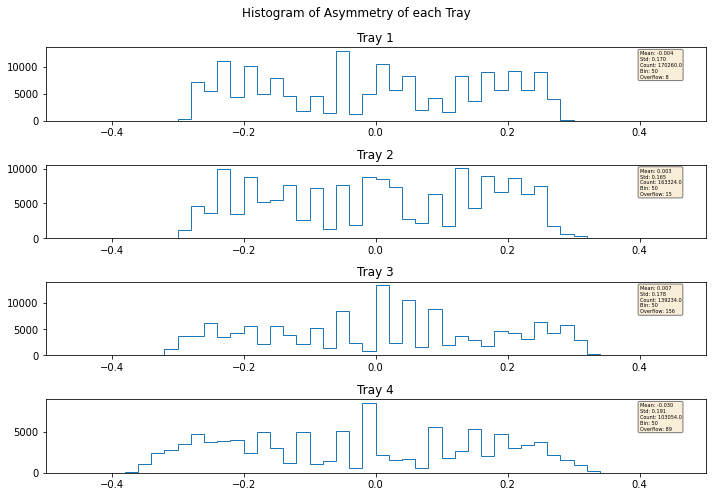

In [146]:
mdfo.getAsymmetry1DPlots()

in module L1vsL2_run_56: 23.0 overflow Events


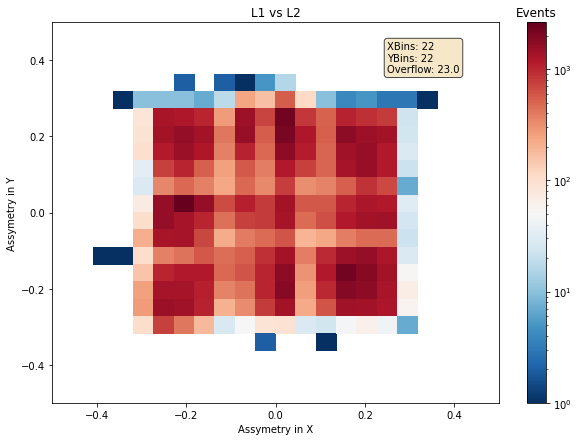

In [147]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 22
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

Looking at the distribution at higher binning

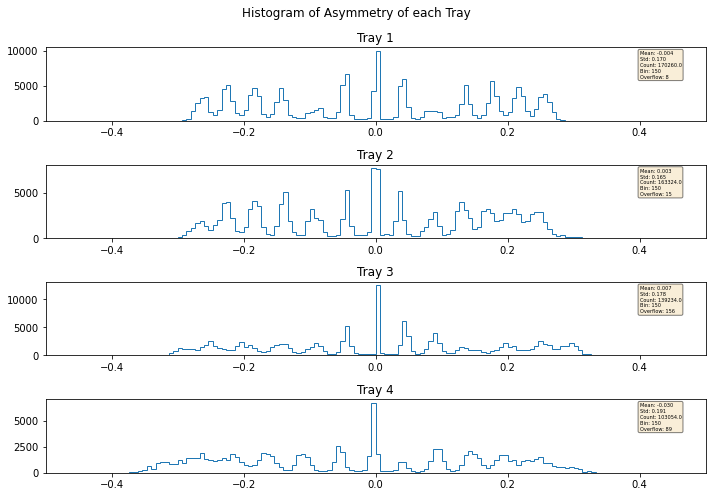

In [148]:
mdfo.getAsymmetry1DPlots(nbin=150)

in module L1vsL2_run_56: 23.0 overflow Events


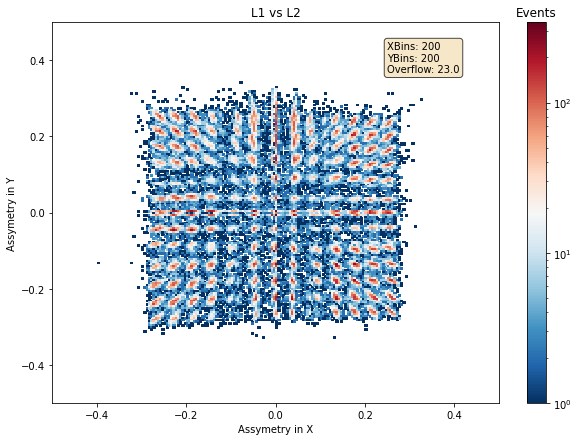

In [149]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 200
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

## Understanding the effect of deadtime

In [150]:
mdfo.getStats("sumL1")

count    170260.000000
mean        194.770234
std          14.200531
min          97.000000
25%         188.000000
50%         195.000000
75%         200.000000
max        1818.000000
Name: sumL1, dtype: float64

In [151]:
mdfo.keepEvents("deadtime", 1500, "<=")

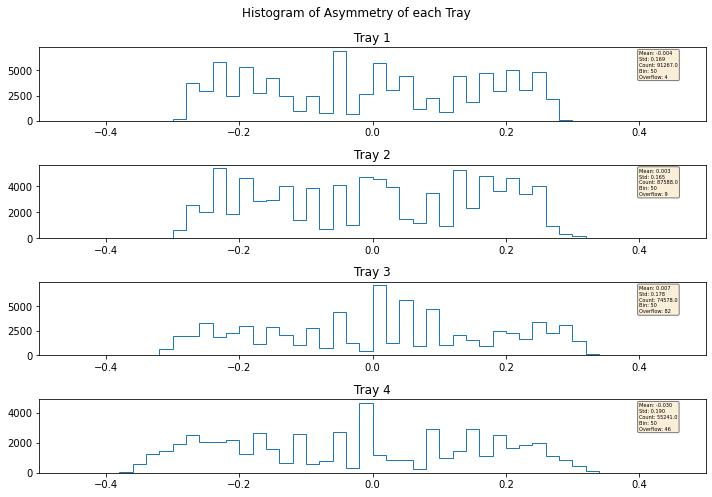

In [152]:
mdfo.getAsymmetry1DPlots()

In [153]:
mdfo.getStats("sumL1")['mean']

194.83241478299934

In [154]:
mdfo.getStats("sumL2")

count    87588.000000
mean       194.904861
std         14.467962
min         75.000000
25%        186.000000
50%        194.000000
75%        202.000000
max       1420.000000
Name: sumL2, dtype: float64

In [155]:
mdfo.getStats("sumL3")

count    74578.000000
mean       175.127987
std         17.701612
min         19.000000
25%        166.000000
50%        173.000000
75%        183.000000
max       1843.000000
Name: sumL3, dtype: float64

In [156]:
mdfo.getStats("sumL4")

count    55241.000000
mean       174.166127
std         15.439030
min         16.000000
25%        165.000000
50%        173.000000
75%        183.000000
max       1126.000000
Name: sumL4, dtype: float64

### Observation 1:
**Deadtime doesn't affect sumTDC and asymmetry data significantly**

---

## Keeping TDC events close to the mean of TDC sums

In [157]:
dev = 5
mdfo.keepEvents("sumL1", mdfo.getStats("sumL1")['mean']+dev, "<=")
mdfo.keepEvents("sumL1", mdfo.getStats("sumL1")['mean']-dev, ">=")

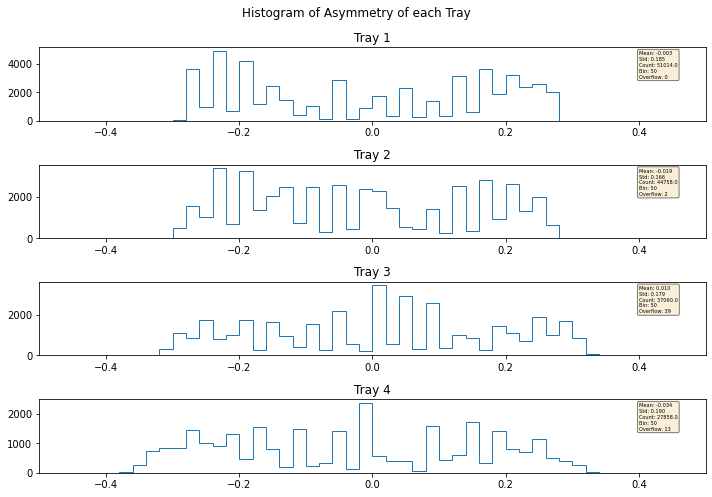

In [158]:
mdfo.getAsymmetry1DPlots()

In [159]:
dev = 5
term = "sumL2"
mdfo.keepEvents(term, mdfo.getStats(term)['mean']+dev, "<=")
mdfo.keepEvents(term, mdfo.getStats(term)['mean']-dev, ">=")

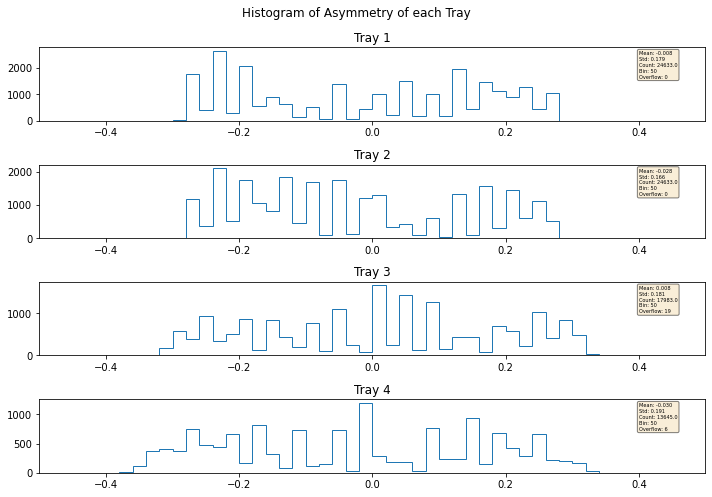

In [160]:
mdfo.getAsymmetry1DPlots()

In [161]:
dev = 5
term = "sumL3"
mdfo.keepEvents(term, mdfo.getStats(term)['mean']+dev, "<=")
mdfo.keepEvents(term, mdfo.getStats(term)['mean']-dev, ">=")

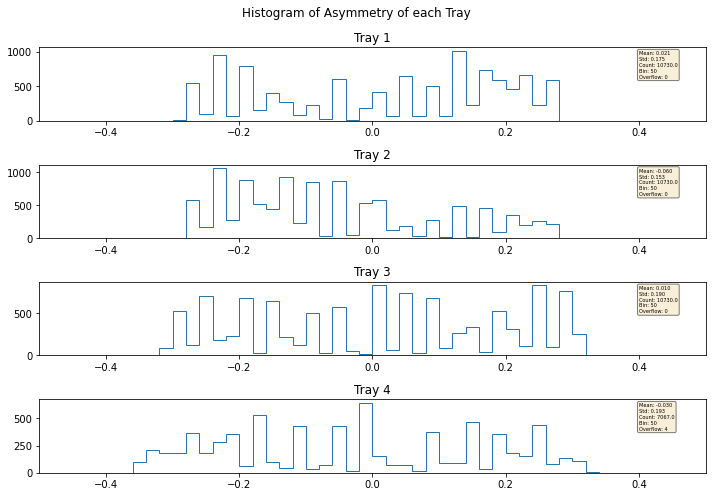

In [162]:
mdfo.getAsymmetry1DPlots()

In [163]:
dev = 5
term = "sumL4"
mdfo.keepEvents(term, mdfo.getStats(term)['mean']+dev, "<=")
mdfo.keepEvents(term, mdfo.getStats(term)['mean']-dev, ">=")

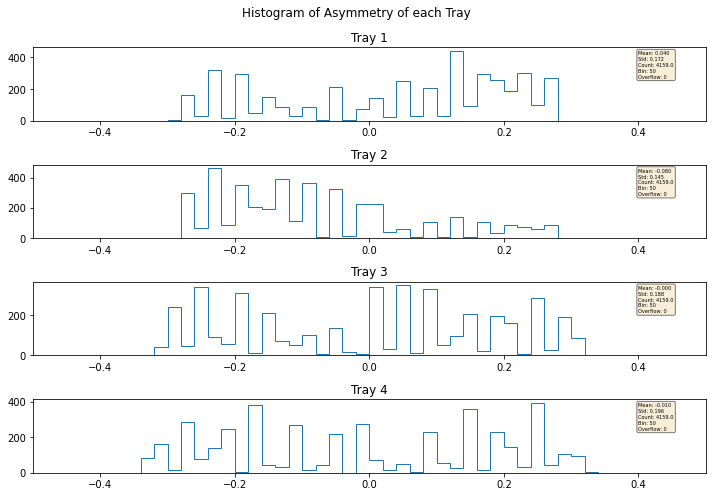

In [164]:
mdfo.getAsymmetry1DPlots()

Looking at the new filtered data set at higher bins

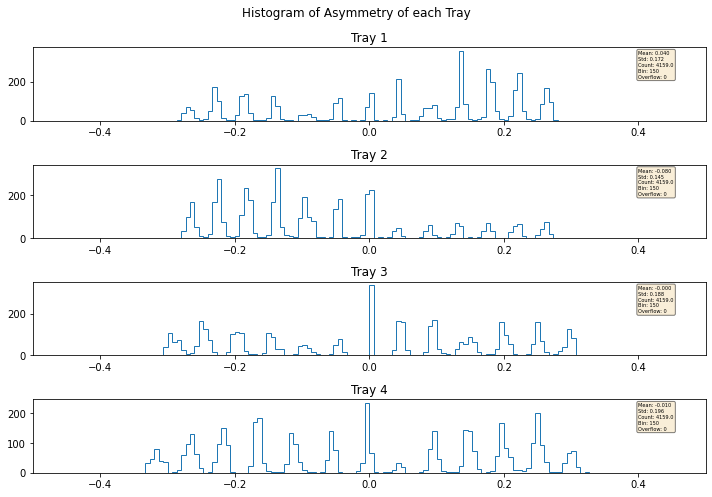

In [169]:
mdfo.getAsymmetry1DPlots(nbin=150)

in module L1vsL2_run_56: 23.0 overflow Events


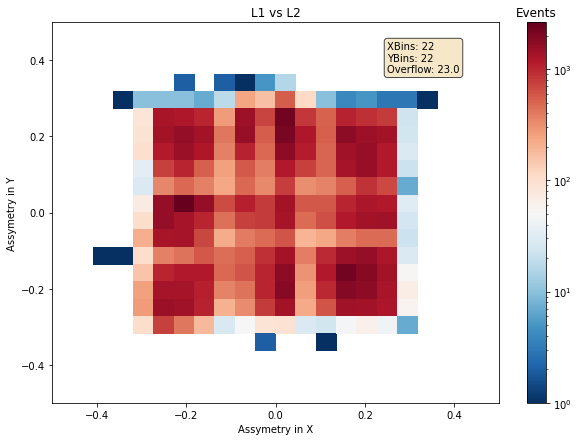

In [170]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 22
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

in module L1vsL2_run_56: 23.0 overflow Events


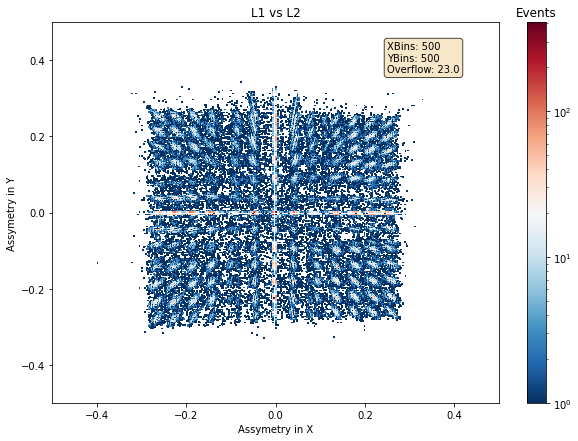

In [171]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 500
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

### Observation 2:

Trimming the data set leads to more refined peaks. However, extra bars are "seen".

We need to address the issue of the "extra" channels. Experiments involving reduced channels can be conducted to isolate the cause of this issue.

### Observation 3:

In Trays 1 and 2, there's some anticorrelation going on in terms of the frequence of the asymmetries. What does this mean?

Trays 3 and 4 look flat. 

*Assuming we are seeing some sort of shadow, then this result makes sense if the lead brick is off centre.*

### Observation 4:

2D Histo does not show any significant difference compared to before. 1D Histos' definitely do.

*This seems to agree with MC results from Cris*

---

## Understanding extra TDC hits registered

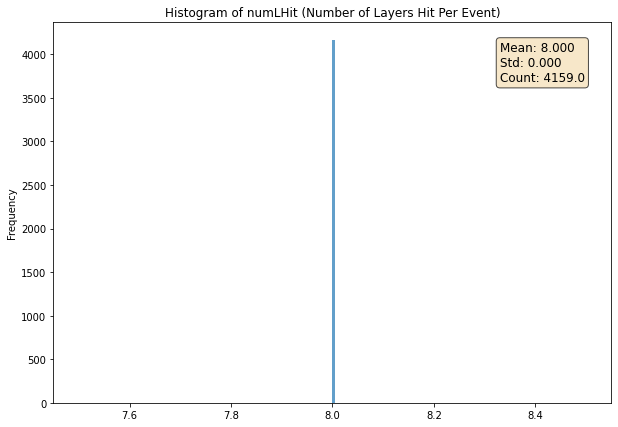

In [173]:
mdfo.getNumLayersHitPlot()

In [174]:
mdfo.lookAt('TDC').values[0]

[[0, 97],
 [1, 89],
 [2, 105],
 [3, 80],
 [4, 73],
 [6, 100],
 [7, 65],
 [8, 61],
 [9, 106],
 [10, 48]]

## Resolution 1:

We get 10 TDC events because we are reading 10 TDC channels! Fixed this issue and implemented in code.

---

Saving this trimmed MDF object

In [184]:
mdfo_best = mdfo

### Muon Hit Angle Calculation (SAS Attempt)

Assuming there is a linear map (scalar) that can transform the *asymmetry* space to *spatial* space. It can be shown that the angles calculated from *spatial* coordinates are the same as the ones from *asymmetry* coordinates

<img src="angle.jpeg" alt="drawing" width="400" height="100"/>

Now lets calculate such angles.

In [4]:
mdfo.keepEvents("numLHit", 8, "==")

In [5]:
mdfo.events_df["angle"] = mdfo.events_df.eval("(asymL4 - asymL2)/(asymL3 - asymL1) % 360")

In [53]:
angles = mdfo.get("angle")

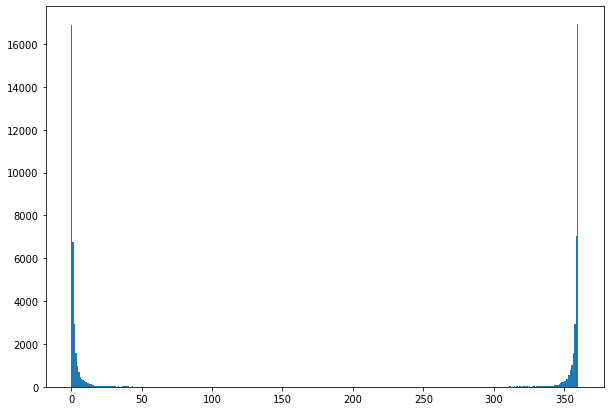

In [54]:
plt.hist(angles,bins=360)
plt.show()

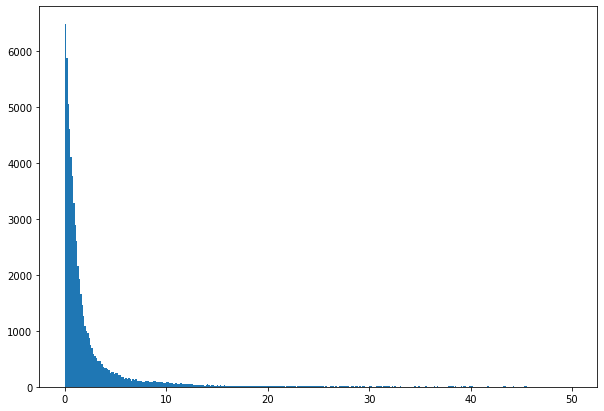

In [47]:
plt.hist(angles,bins=360,range=(0,50))
plt.show()

I may have messed up on the calculation logic somewhere. Now, we can explore the cutting scheme that Cris and Dr. Kunori suggested if necessary.

---

### Muon Hit Angle Calculation (Correct Way)

<img src="angle2.jpeg" alt="drawing" width="400" height="100"/>

In [6]:
mdfo.keepEvents("numLHit", 8, "==")

In [7]:
theta_x1 = mdfo.events_df.eval("asymL2/asymL1")*(360/np.pi)
theta_y1 = mdfo.events_df.eval("asymL1/asymL2")*(360/np.pi)
theta_x2 = mdfo.events_df.eval("asymL4/asymL3")*(360/np.pi)
theta_y2 = mdfo.events_df.eval("asymL3/asymL4")*(360/np.pi)

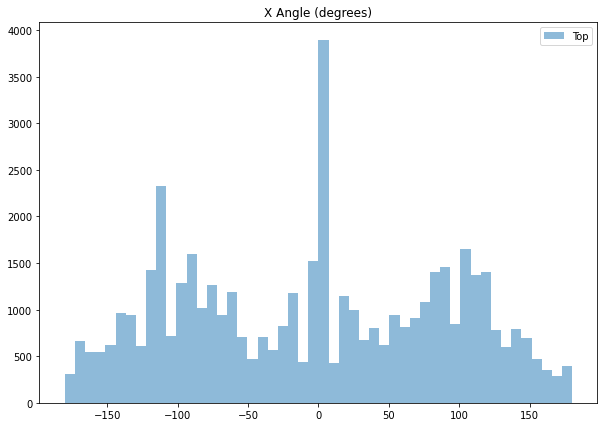

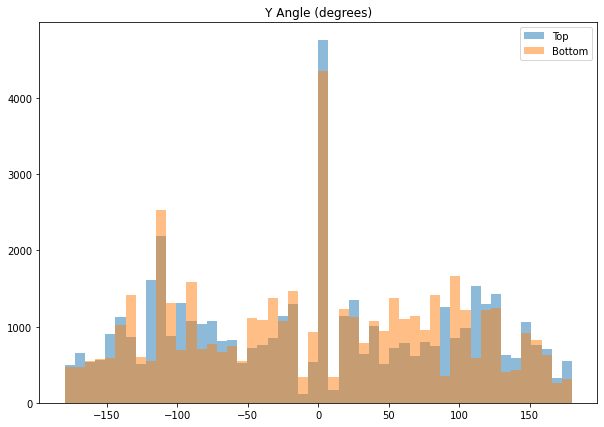

In [8]:
a_min = -180
a_max = 180
nbin = 50

plt.hist(theta_x1,bins=nbin,range=(a_min,a_max), alpha = 0.5, label ="Top")
plt.title("X Angle (degrees)")
#plt.hist(theta_x2,bins=nbin,range=(a_min,a_max), alpha = 0.5, label ="Bottom")
plt.legend()
plt.show()

plt.hist(theta_y1,bins=nbin,range=(a_min,a_max), alpha = 0.5, label ="Top")
plt.title("Y Angle (degrees)")
plt.hist(theta_y2,bins=nbin,range=(a_min,a_max), alpha = 0.5, label ="Bottom")
plt.legend()
plt.show()

In [9]:
import numpy as np
d_phys = 2 #meters
toTheta = 360/np.pi

Converting the distance between the two tray sets (meters) to asymmetry quantities (no units) using the following equation.
$$physical = 1.1*asymmetry$$ 

In [10]:
def getPhysicalUnits(asym):
    return (0.55/0.5)*asym

def getAsymmetryUnits(phys):
    return (1/(0.55/0.5))*phys

In [152]:
asymT1 = mdfo.get("asymL1")
asymT2 = mdfo.get("asymL2")

d_asym = getAsymmetryUnits(d_phys/2)
#d_asym = 
print(d_asym)

zangles = np.arctan(np.sqrt(asymT1**2+asymT2**2)/d_asym)*toTheta
mdfo.events_df["z_angle"] = zangles

0.9090909090909091


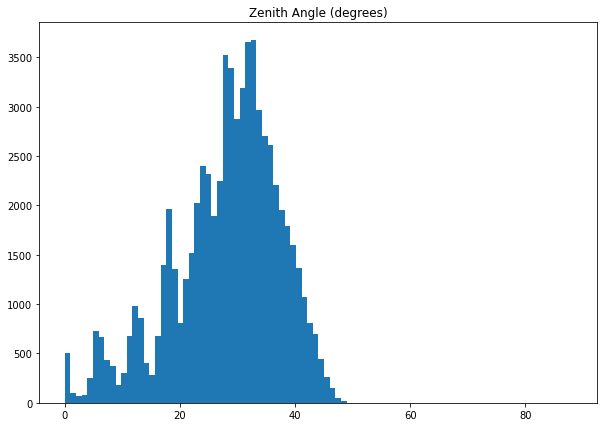

In [153]:
plt.hist(zangles,bins=90)
plt.title("Zenith Angle (degrees)")
plt.show()

### Image Reconstruction: *Extrapolation of Angles to Lead Brick Plane*



In [13]:
d_lead_plane = 0.42 #meters
xHits = d_lead_plane * np.tan(zangles)

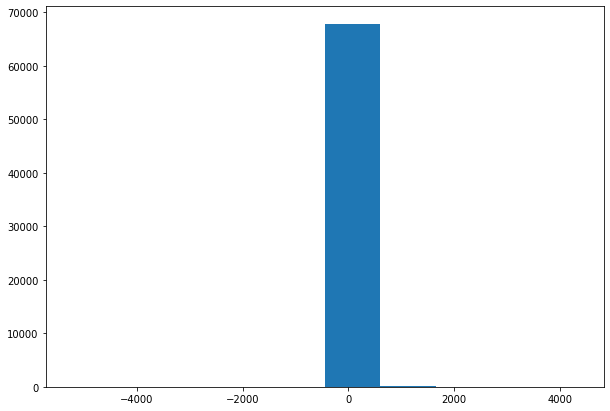

In [14]:
plt.hist(xHits)
plt.xlim([min(xHits),max(xHits)])
plt.show()

Removing extreme values

In [15]:
def reject_outliers(data, m=1):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [16]:
xHits_new = reject_outliers(xHits)

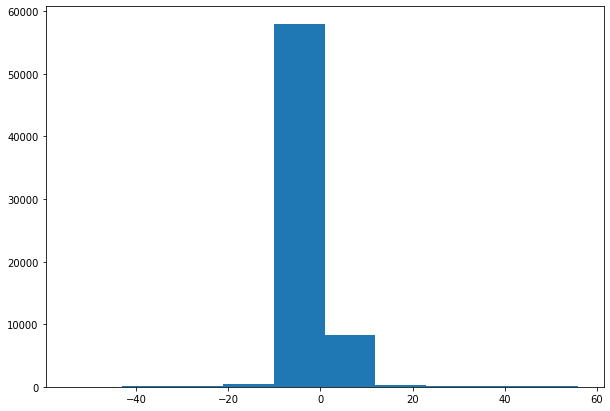

In [17]:
plt.hist(xHits_new)
plt.show()

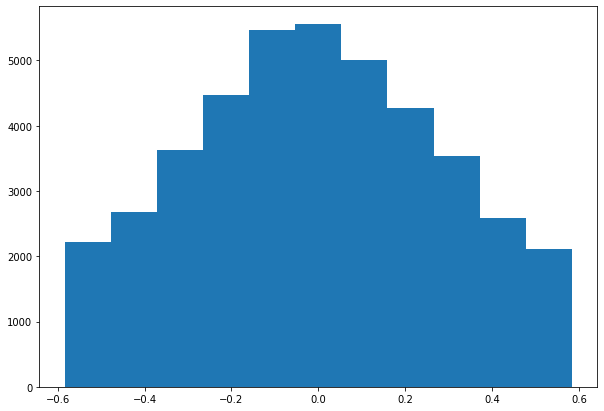

In [18]:
xMax = 0.5842
xMin = -0.5842

plt.hist(xHits_new,range=(xMin,xMax), bins=11)
#plt.xlim([min(xHits),max(xHits)])
plt.show()

At higher binning.

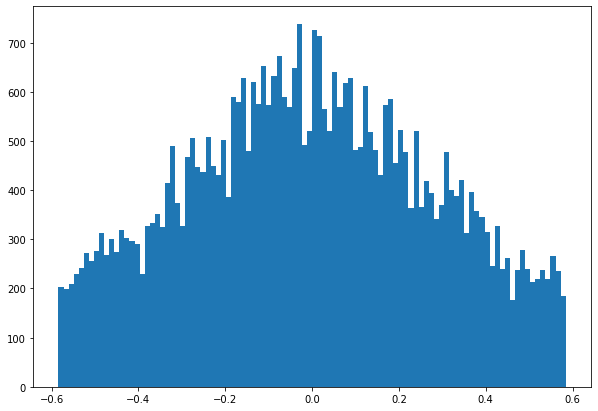

In [19]:
xMax = 0.5842
xMin = -0.5842

plt.hist(xHits_new,range=(xMin,xMax), bins=100)
#plt.xlim([min(xHits),max(xHits)])
plt.show()

### Muon Track Reconstruction: *Parametric Linear Extrapolation Method*

Attempt at implementing the method suggested by Dr. Akchurin

In [20]:
d_trays = 2 #distance (m) between two tray sets
d_lead = 0.42 #distance (m) between top tray and lead brick

asymT1 = mdfo.get("asymL1")
asymT2 = mdfo.get("asymL2")
asymT3 = mdfo.get("asymL3")
asymT4 = mdfo.get("asymL4")

def x(t):
    return asymT1 + asymT3*t

def y(t):
    return asymT2 + asymT4*t

def z(t):
    return -(d_trays/2) + d_trays*t

def getTValue(d_tray, d_lead):
    return -(d_trays/2) - d_lead

In [21]:
t = getTValue(d_trays, d_lead)
t

-1.42

In [22]:
xx = x(t)
yy = y(t)

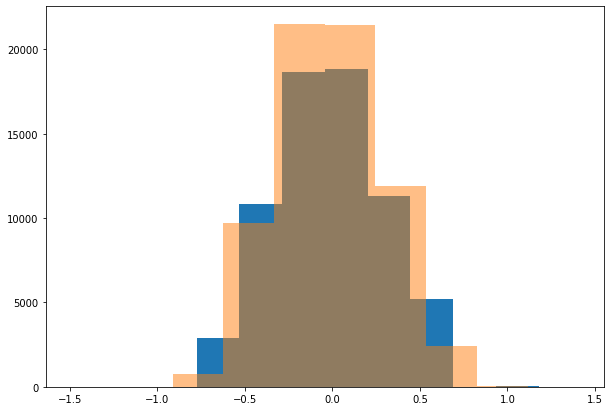

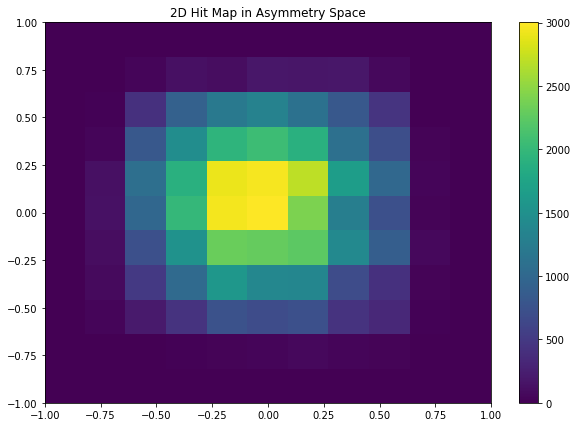

In [23]:
from matplotlib.colors import LogNorm

xmin = -1
ymin = -1
xmax = 1
ymax = 1


h = plt.hist2d(xx,yy,range=[[xmin, xmax], [ymin, ymax]],bins=11)
plt.title("2D Hit Map in Asymmetry Space")
plt.colorbar(h[3])
plt.show()

In [24]:
xp = getPhysicalUnits(xx)
yp = getPhysicalUnits(yy)

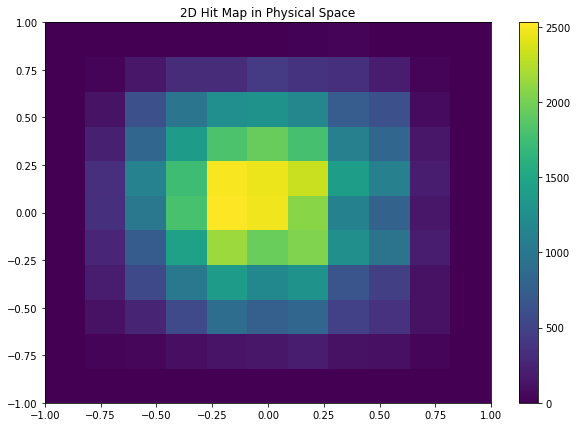

In [25]:
xmin = -1
ymin = -1
xmax = 1
ymax = 1

h1 = plt.hist2d(xp,yp,range=[[xmin, xmax], [ymin, ymax]],bins=11)
plt.title("2D Hit Map in Physical Space")
plt.colorbar(h1[3])
plt.show()

## Generating Tomogram for *No Lead Brick* Case

In [26]:
from MuonDataFrame import *
file2 = "processed_data/events_data_frame_63.h5"
mdfo1 = MuonDataFrame(file2, isNew=False, d1="last") #Muon Data Frame Object 

In [27]:
mdfo1.keepEvents("numLHit", 8, "==")

In [32]:
asymT1_nlb = mdfo1.get("asymL1")
asymT2_nlb = mdfo1.get("asymL2")
asymT3_nlb = mdfo1.get("asymL3")
asymT4_nlb = mdfo1.get("asymL4")

def x1(t):
    return asymT1_nlb + asymT3_nlb*t

def y1(t):
    return asymT2_nlb + asymT4_nlb*t

def z1(t):
    return -(d_trays/2) + d_trays*t

def getTValue(d_tray, d_lead):
    return -(d_trays/2) - d_lead


In [33]:
xx_nlb = x1(t)
yy_nlb = y1(t)

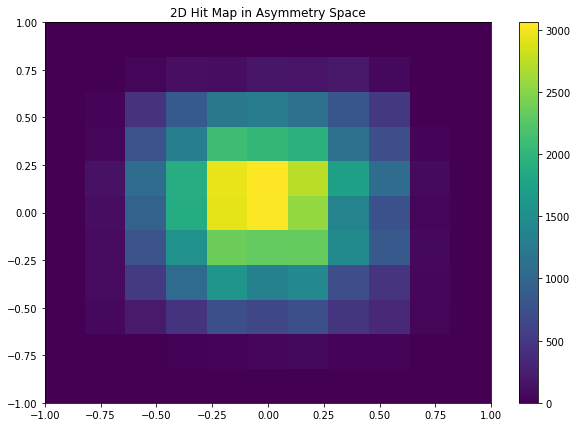

In [34]:
xmin = -1
ymin = -1
xmax = 1
ymax = 1


h = plt.hist2d(xx_nlb,yy_nlb,range=[[xmin, xmax], [ymin, ymax]],bins=11)
plt.title("2D Hit Map in Asymmetry Space")
plt.colorbar(h[3])
plt.show()

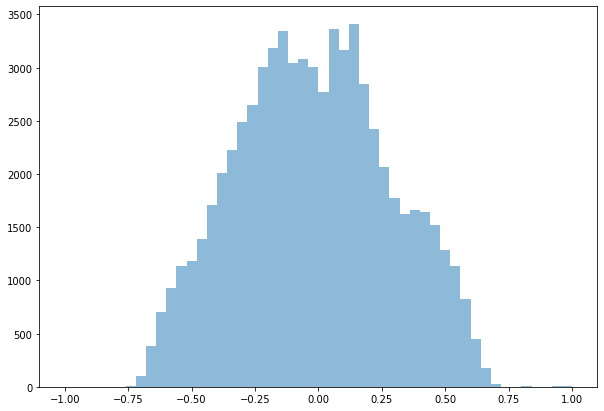

In [47]:
plt.hist(xx,alpha=0.5,range=(-1,1),bins=50)
plt.show()

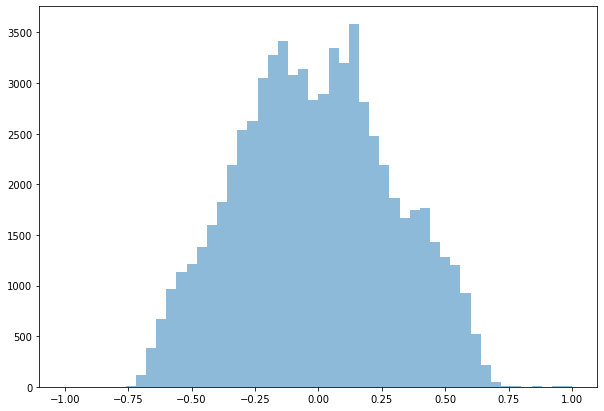

In [48]:
plt.hist(xx_nlb,alpha=0.5,range=(-1,1),bins=50)
plt.show()

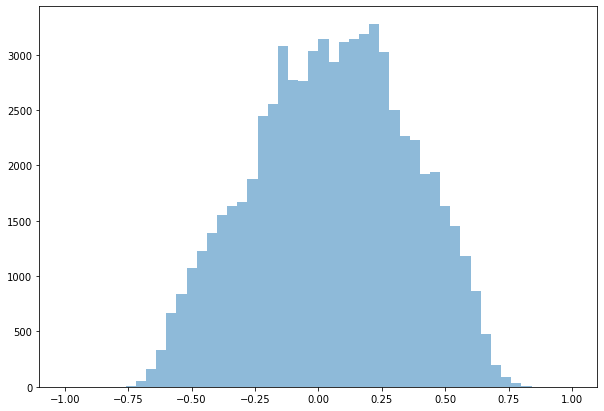

In [49]:
plt.hist(yy,alpha=0.5,range=(-1,1),bins=50)
plt.show()

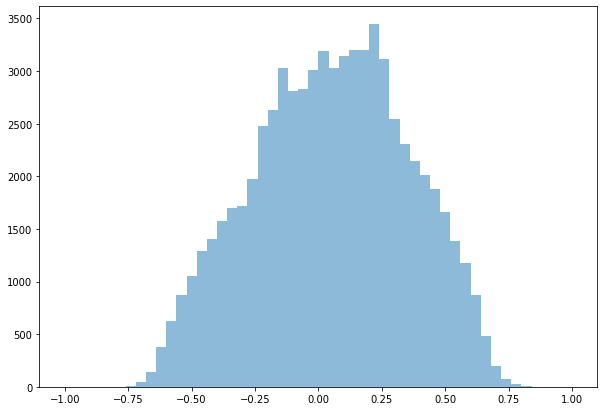

In [50]:
plt.hist(yy_nlb,alpha=0.5,range=(-1,1),bins=50)
plt.show()

In [53]:
len(yy), len(yy_nlb)

(67772, 68692)

In [52]:
len(xx), len(xx_nlb)

(67772, 68692)

Since the arrays are not of the same size. I am resizing them.

In [55]:
min_num = min(len(xx), len(xx_nlb))
min_num

67772

In [57]:
xx = xx[0:min_num]
yy = yy[0:min_num]

array([-0.11592584,  0.17021376,  0.18941414, ..., -0.36814815,
        0.22922842,  0.53240551])

In [60]:
xx_nlb = xx_nlb[0:min_num]
yy_nlb = yy_nlb[0:min_num]

67772

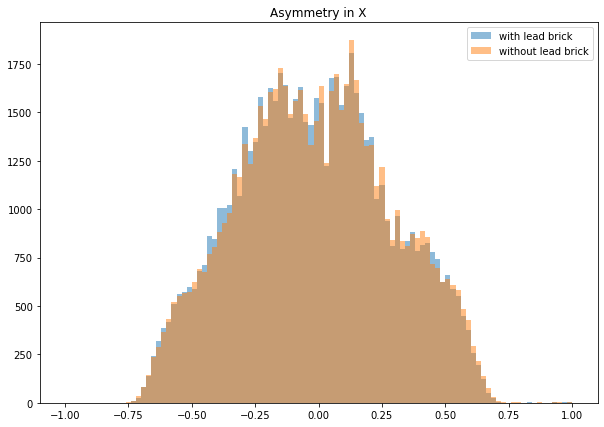

In [68]:
plt.hist(xx,alpha=0.5,bins=100,range=(-1,1),label="with lead brick")
plt.hist(xx_nlb,alpha=0.5,bins=100,range=(-1,1),label="without lead brick")
plt.legend()
plt.title("Asymmetry in X")
plt.show()

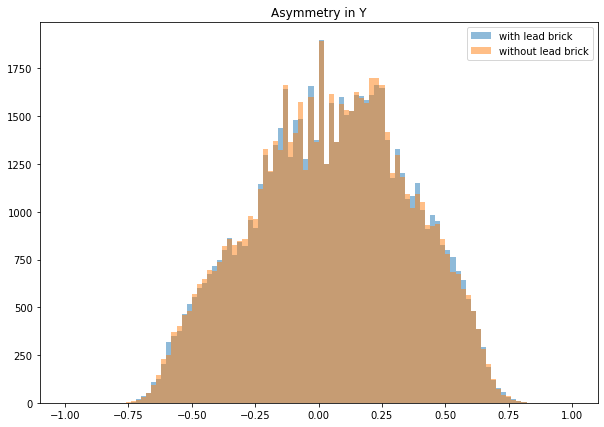

In [69]:
plt.hist(yy,alpha=0.5,bins=100,range=(-1,1),label="with lead brick")
plt.hist(yy_nlb,alpha=0.5,bins=100,range=(-1,1),label="without lead brick")
plt.legend()
plt.title("Asymmetry in Y")
plt.show()

In [93]:
x_ratio =  xx_nlb / xx

In [94]:
y_ratio =  yy_nlb / yy

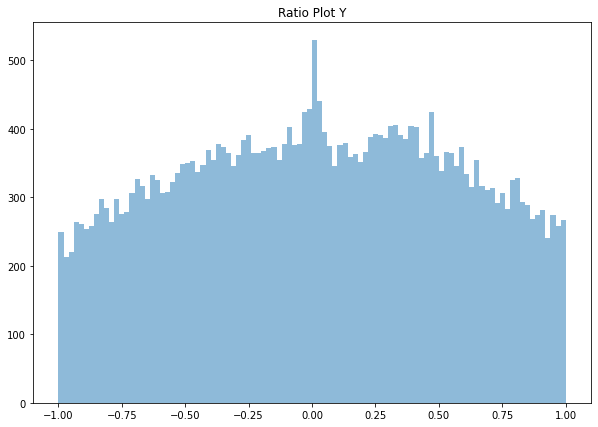

In [104]:
plt.hist(y_ratio,alpha=0.5,bins=100,range=(-1,1))
plt.title("Ratio Plot Y")
plt.show()

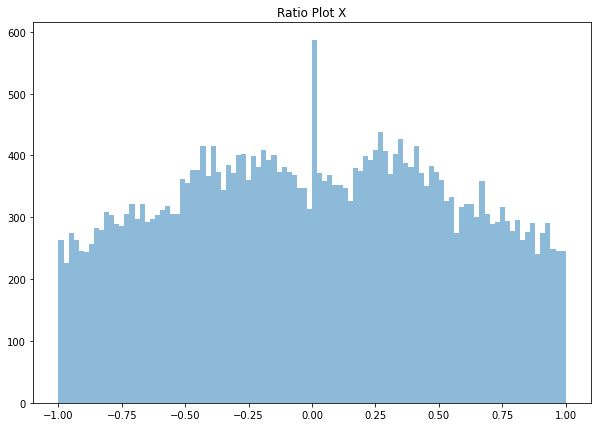

In [103]:
plt.hist(x_ratio,alpha=0.5,bins=100,range=(-1,1))
plt.title("Ratio Plot X")
plt.show()

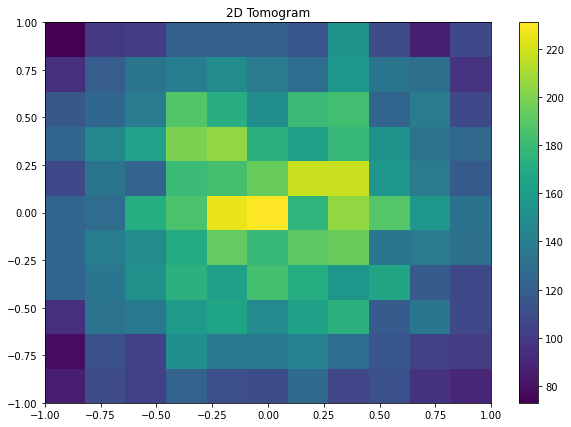

In [108]:
xmin = -1
ymin = -1
xmax = 1
ymax = 1


h = plt.hist2d(x_ratio,y_ratio,range=[[xmin, xmax], [ymin, ymax]],bins=11)
plt.title("2D Tomogram")
plt.colorbar(h[3])
plt.show()

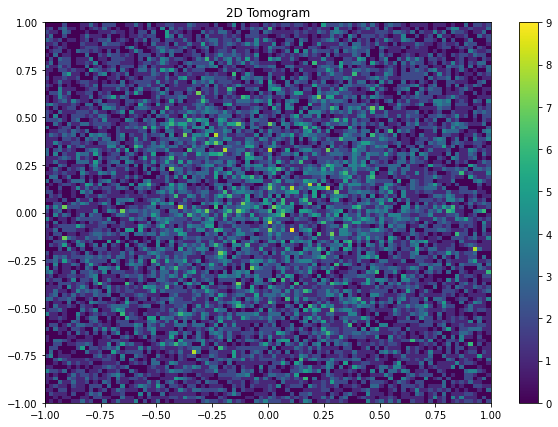

In [107]:
xmin = -1
ymin = -1
xmax = 1
ymax = 1

h = plt.hist2d(x_ratio,y_ratio,range=[[xmin, xmax], [ymin, ymax]],bins=100)
plt.title("2D Tomogram")
plt.colorbar(h[3])
plt.show()

In [100]:
x_diff =  xx - xx_nlb
y_diff =  yy - yy_nlb

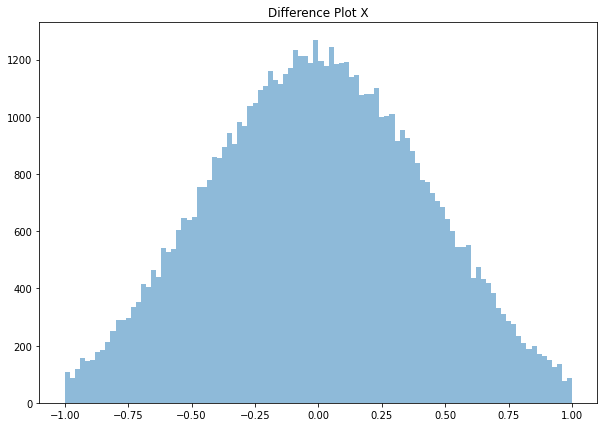

In [109]:
plt.hist(x_diff,alpha=0.5,bins=100,range=(-1,1))
plt.title("Difference Plot X")
plt.show()

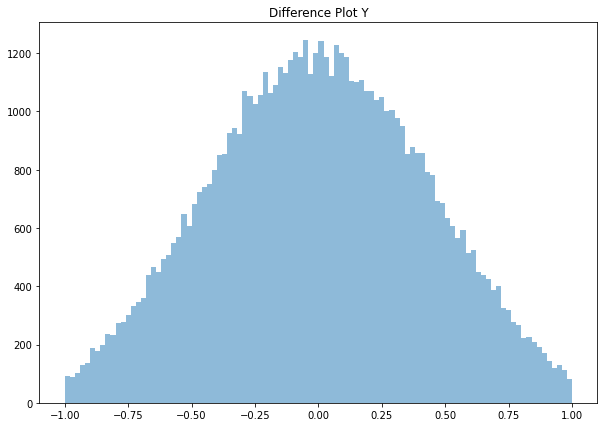

In [111]:
plt.hist(y_diff,alpha=0.5,bins=100,range=(-1,1))
plt.title("Difference Plot Y")
plt.show()

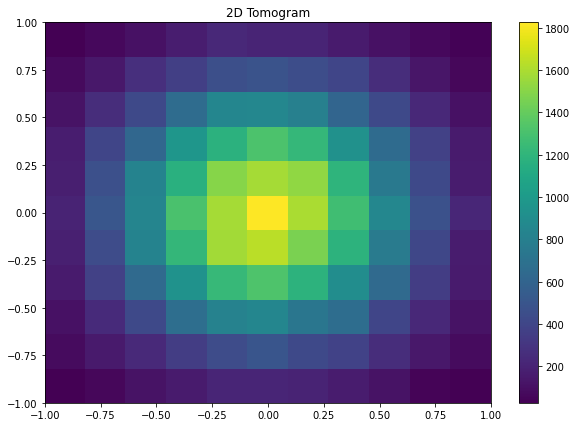

In [113]:
xmin = -1
ymin = -1
xmax = 1
ymax = 1

h = plt.hist2d(x_diff,y_diff,range=[[xmin, xmax], [ymin, ymax]],bins=11)
plt.title("2D Tomogram")
plt.colorbar(h[3])
plt.show()

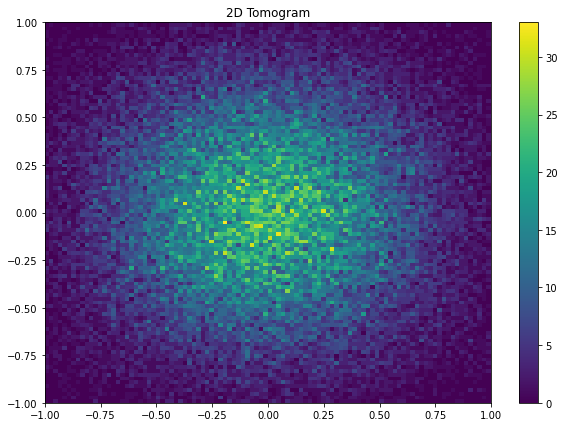

In [114]:
xmin = -1
ymin = -1
xmax = 1
ymax = 1

h = plt.hist2d(x_diff,y_diff,range=[[xmin, xmax], [ymin, ymax]],bins=100)
plt.title("2D Tomogram")
plt.colorbar(h[3])
plt.show()

Doing it again. Carefully...

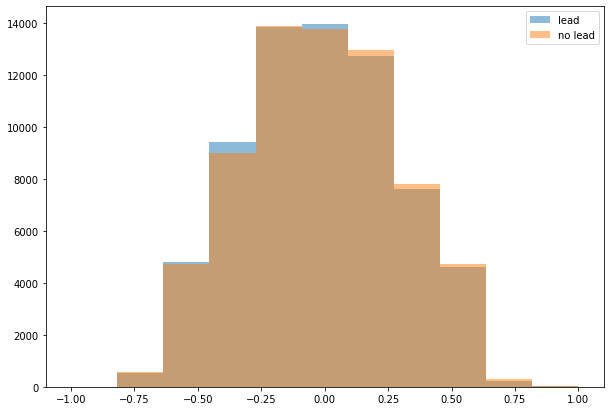

In [131]:
plt.hist(xx,bins=11,alpha=0.5,range=(-1,1),label="lead")
plt.hist(xx_nlb,alpha=0.5,bins=11,range=(-1,1),label="no lead")
plt.legend()
plt.show()

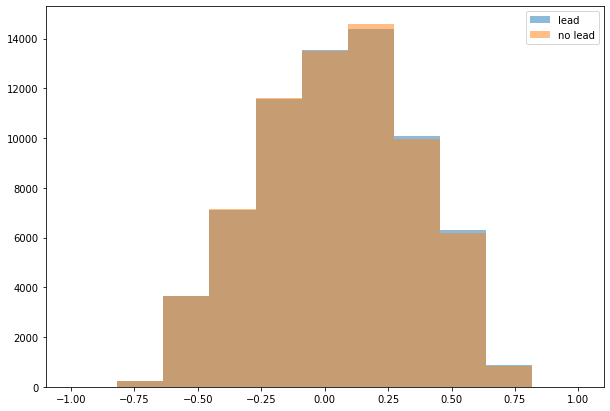

In [132]:
plt.hist(yy,bins=11,alpha=0.5,range=(-1,1),label="lead")
plt.hist(yy_nlb,alpha=0.5,bins=11,range=(-1,1),label="no lead")
plt.legend()
plt.show()

In [135]:
asymT1_nlb = mdfo1.get("asymL1")
asymT2_nlb = mdfo1.get("asymL2")

d_asym = getAsymmetryUnits(d_phys/2)
#d_asym = 
print(d_asym)

zangles_nlb = np.arctan(np.sqrt(asymT1_nlb**2+asymT2_nlb**2)/d_asym)*toTheta
mdfo1.events_df["z_angle"] = zangles

0.9090909090909091


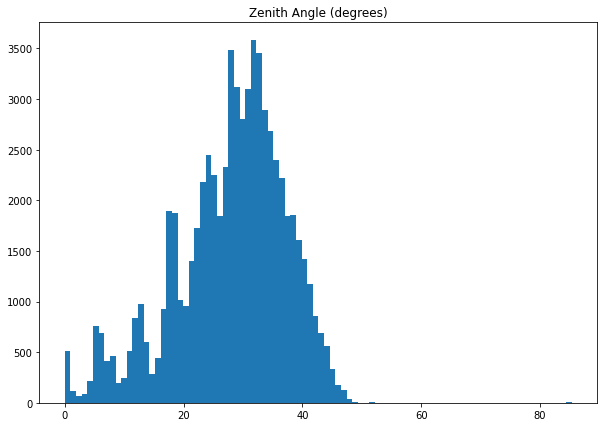

In [144]:
plt.hist(zangles_nlb,bins=90)
plt.title("Zenith Angle (degrees)")
plt.show()

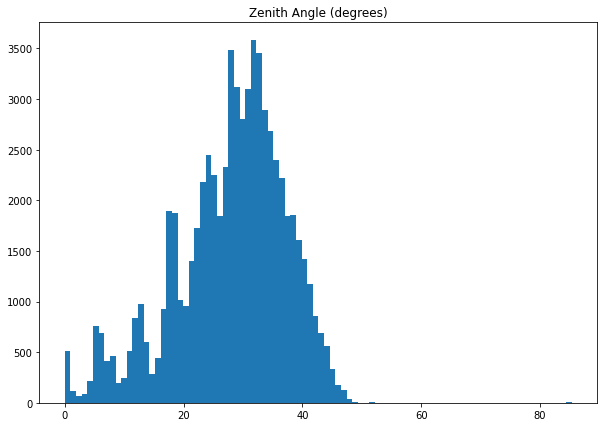

In [145]:
plt.hist(zangles,bins=90)
plt.title("Zenith Angle (degrees)")
plt.show()

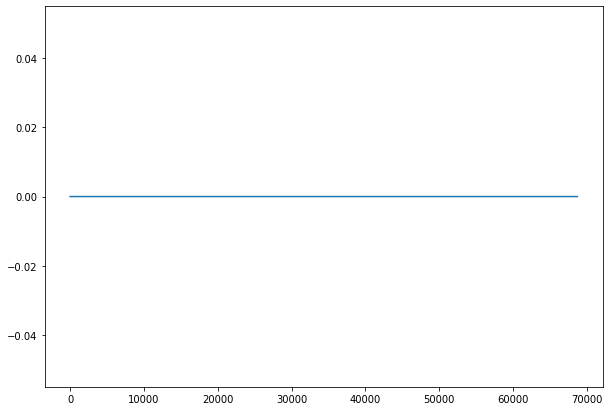

In [151]:
x = zangles-zangles_nlb

plt.plot([i for i in range(len(x))],x)

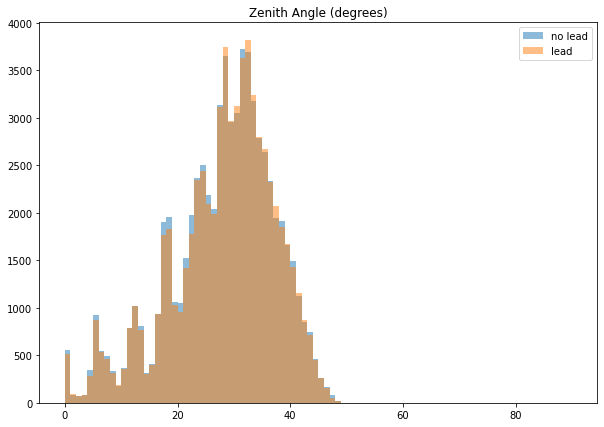

In [156]:
plt.hist(zangles_nlb,bins=90,alpha=0.5,range=(0,90),label="no lead")
plt.hist(zangles,bins=90, alpha=0.5,range=(0,90),label="lead")
plt.title("Zenith Angle (degrees)")
plt.legend()
plt.show()